# Tarea6: Thread in an Equilateral triangle

In this exercise we have a equilateral triangle with a side length of 20cm and a thread of length 70cm.\
The task is to place the thread to cover as much area as possible.\
We assume the thread has no thickness but is rather a continous line of points.

The exercise seems a bit off: 
To cover an area (which is closed off) the start and end point of the thread need to be connected. 
However, with a length of 70cm and a total boarder lenght of the triangle of 3 * 20cm = 60cm, the thread is already longer than all boarders combined. 

Therefore, when placed on the boarder the Thread will cover 100% of the triangle area, which is the maximum possible area to cover. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches


Triangle side length: 20.0 cm
Triangle perimeter: 60.0 cm
Wire length: 70.0 cm
Triangle area: 173.21 cm²

Enough wire to encircle the triangle with leftover wire.
Leftover wire length: 10.0 cm


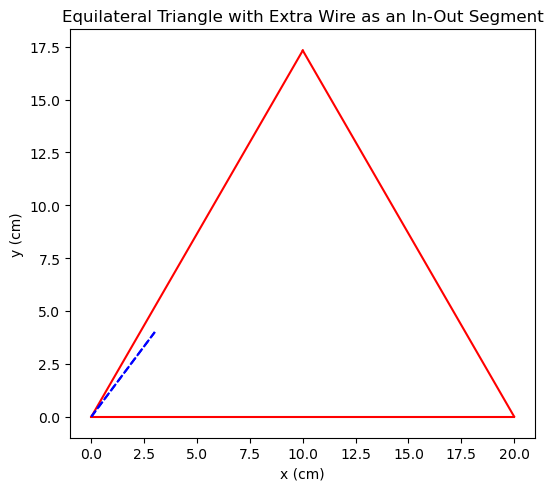

In [2]:
def area_of_equilateral_triangle(side_length: float) -> float:
    """
    Computes the area of an equilateral triangle of side side_length.
    Formula: (sqrt(3) / 4) * side_length^2
    """
    return (math.sqrt(3) / 4) * (side_length ** 2)

l = 20.0 

wire_length = 70.0 

perimeter = 3 * l


triangle_area = area_of_equilateral_triangle(l)

print(f"Triangle side length: {l} cm")
print(f"Triangle perimeter: {perimeter} cm")
print(f"Wire length: {wire_length} cm")
print(f"Triangle area: {triangle_area:.2f} cm²\n")

if wire_length < perimeter:
    print("Not enough wire to go around the entire triangle.")
else:
    print("Enough wire to encircle the triangle with leftover wire.")
    leftover_wire = wire_length - perimeter  # should be 10 cm
    print(f"Leftover wire length: {leftover_wire} cm")

# Plotting the triangle 
x1, y1 = 0, 0
x2, y2 = l, 0
x3, y3 = l/2, (math.sqrt(3)/2) * l

fig, ax = plt.subplots(figsize=(6, 6))

# triangle edges in red (covered 100% by wire)
ax.plot([x1, x2], [y1, y2], 'r-')  
ax.plot([x2, x3], [y2, y3], 'r-')  
ax.plot([x3, x1], [y3, y1], 'r-') 


# leftover wire in blue going inside and out of the triangel (5cm in, 5cm out)
half_leftover = leftover_wire / 2  

p_in_x, p_in_y = 3, 4

# Draw the two line segments in dashed blue
ax.plot([x1, p_in_x], [y1, p_in_y], 'b--')  # segment in
ax.plot([p_in_x, x1], [p_in_y, y1], 'b--')  # segment out

# padding to see trianle better
padding = 1
min_x = min(x1, x2, x3) - padding
max_x = max(x1, x2, x3) + padding
min_y = min(y1, y2, y3) - padding
max_y = max(y1, y2, y3) + padding

ax.set_xlim(min_x, max_x)
ax.set_ylim(min_y, max_y)
ax.set_aspect('equal', 'box')

ax.set_title("Equilateral Triangle with Extra Wire as an In-Out Segment")
ax.set_xlabel("x (cm)")
ax.set_ylabel("y (cm)")

plt.show()


## Different interpretation of assignment

As the above task doesn't seem to make a lot of sense to me let's assume in the following the task would be to minimze density of the wire placed within the triangle.

To do so we will use a snake like approach and fill up the triangle with equally spaced windings of the wire. Please note this does not actually form an area but a winded line.

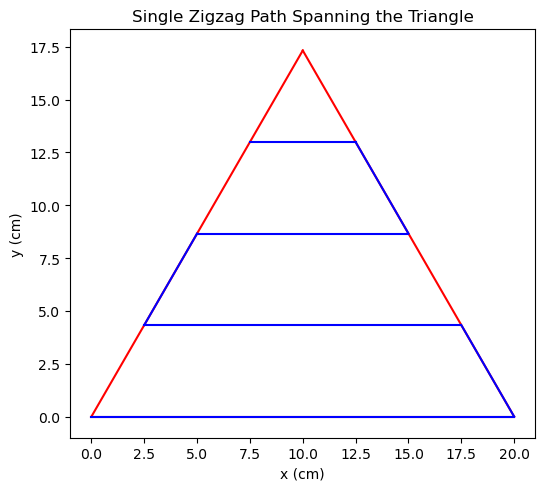

In [3]:
def triangle_height(side: float) -> float:
    return (math.sqrt(3)/2) * side

def x_left_boundary(y: float, side: float) -> float:
    h = triangle_height(side)
    return (side/2) * (y / h)

def x_right_boundary(y: float, side: float) -> float:
    h = triangle_height(side)
    return side + (y/h)*((side/2) - side)

def length_of_segment(x1, y1, x2, y2):
    """Euclidean distance between two points."""
    return math.hypot(x2 - x1, y2 - y1)

def build_snake_path(side=20.0, total_wire=70.0, N=20):
    """
    Build one continuous “snake” path from the bottom to the top of an
    equilateral triangle of side = 20cm, using 'total_wire' cm of wire.
    
    - We partition the triangle height into N strips.
    - For each strip k, we draw a horizontal line from left->right or right->left
      and then connect to the next strip.
    - If we run out of wire, we truncate the last segment.
    
    Returns a list of consecutive line segments [((x1,y1),(x2,y2)), ...].
    """
    h = triangle_height(side)
    segments = []
    used_length = 0.0

    y_coords = [i * (h / N) for i in range(N+1)]
    
    curr_x = 0.0
    curr_y = 0.0
    
    for k in range(N):
        y_curr = y_coords[k]
        
        # 1) Draw the horizontal segment in row k
        if k % 2 == 0: 
            x_start = x_left_boundary(y_curr, side)
            x_end   = x_right_boundary(y_curr, side)
        else:
            x_start = x_right_boundary(y_curr, side)
            x_end   = x_left_boundary(y_curr, side)
        
        # connecting windings
        connector_len = length_of_segment(curr_x, curr_y, x_start, y_curr)
        if used_length + connector_len > total_wire:
            needed = total_wire - used_length
            if needed <= 0: 
                break  # no more wire left
            ratio = needed / connector_len
            x_partial = curr_x + ratio * (x_start - curr_x)
            y_partial = curr_y + ratio * (y_curr - curr_y)
            segments.append(((curr_x, curr_y), (x_partial, y_partial)))
            used_length += needed
            break
        else:
            segments.append(((curr_x, curr_y), (x_start, y_curr)))
            used_length += connector_len
        
        # horiz segment
        horiz_len = abs(x_end - x_start) 
        if used_length + horiz_len > total_wire:
            # Truncate horizontal segment
            needed = total_wire - used_length
            if needed <= 0:
                break
            ratio = needed / horiz_len
            x_partial = x_start + ratio * (x_end - x_start)
            segments.append(((x_start, y_curr), (x_partial, y_curr)))
            used_length += needed
            break
        else:
            segments.append(((x_start, y_curr), (x_end, y_curr)))
            used_length += horiz_len

        curr_x = x_end
        curr_y = y_curr
    
    return segments

side = 20.0  
wire = 70.0  
N = 4

snake_segments = build_snake_path(side, wire, N)






# Plot
fig, ax = plt.subplots(figsize=(6, 6))
h = triangle_height(side)

# triangle
xA, yA = 0, 0
xB, yB = side, 0
xC, yC = side/2, h
ax.plot([xA, xB], [yA, yB], 'r-')   
ax.plot([xB, xC], [yB, yC], 'r-')   
ax.plot([xC, xA], [yC, yA], 'r-')

# snake path
for seg in snake_segments:
    (sx, sy), (ex, ey) = seg
    ax.plot([sx, ex], [sy, ey], 'b-', lw=1.5)

ax.set_aspect('equal', 'box')
ax.set_xlim(-1, side+1)
ax.set_ylim(-1, h+1)
ax.set_title("Single Zigzag Path Spanning the Triangle")
ax.set_xlabel("x (cm)")
ax.set_ylabel("y (cm)")

plt.show()
